In [11]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Modeling prior predictive distribution

In [12]:
gen_quant = CmdStanModel(stan_file='model_1.stan')

INFO:cmdstanpy:compiling stan file /home/lab3/model_1.stan to exe file /home/lab3/model_1
INFO:cmdstanpy:compiled model executable: /home/lab3/model_1


In [16]:
samples = gen_quant.sample(data={'N': 50}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains=1)

df = samples.draws_pd()
df.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.138852,7.0
1,0.0,0.0,50.0,0.110738,7.0
2,0.0,0.0,50.0,0.102983,3.0
3,0.0,0.0,50.0,0.236405,15.0
4,0.0,0.0,50.0,0.275693,16.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


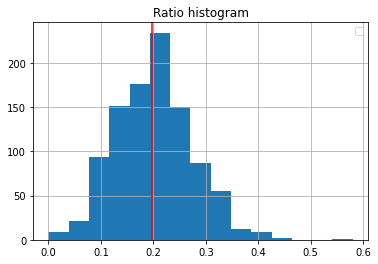

In [32]:
df['ratio'].hist(bins=15)
plt.axvline(x=ratio_mean, color ='r')
plt.title('Ratio histogram')
plt.legend()
plt.show()


In [31]:
df['ratio'] = df.y / 50
ratio_mean = df['ratio'].mean()
ratio_mean

0.19808000000000003

#### Given that an allergic reaction occurs in about 20% of cases, the mean of the ratio is correct

## Modeling posterior and posterior predictive distribution

In [33]:
gen_quant = CmdStanModel(stan_file='model_2.stan')

INFO:cmdstanpy:compiling stan file /home/lab3/model_2.stan to exe file /home/lab3/model_2
INFO:cmdstanpy:compiled model executable: /home/lab3/model_2


In [34]:
samples = gen_quant.sample(data={'N':50, 'y':7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [35]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-22.9043,1.000000,0.970385,1.0,1.0,0.0,23.0458,0.211241,8.0
1,-22.5381,1.000000,0.970385,1.0,3.0,0.0,22.8026,0.183299,8.0
2,-22.9148,0.936501,0.970385,2.0,3.0,0.0,22.9511,0.146237,9.0
3,-24.5565,0.913856,0.970385,2.0,3.0,0.0,25.8480,0.256343,14.0
4,-23.0142,1.000000,0.970385,2.0,3.0,0.0,24.4608,0.142452,10.0


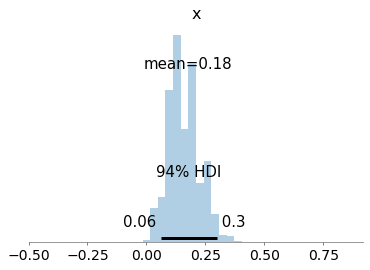

In [41]:
ratios = df['y_pred'] / 50
ratios = ratios.to_numpy()

az.plot_posterior(ratios, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.show()

In [45]:
p = df['p'].to_numpy()

ratio_mean = np.mean(ratios)
ratio_hdi = az.hdi(ratios, hdi_prob=0.94)

p_mean = np.mean(p)
p_hdi = az.hdi(p, hdi_prob=0.94)

p_avg = 0.2
ratio_prob = np.mean(ratios < p_avg)

print(f"Predicted ratio: mean = {ratio_mean:.3f}, 94% HDI = {ratio_hdi}")
print(f"Parameter p: mean = {p_mean:.3f}, 94% HDI = {p_hdi}")
print(f"Probability that ratio is lower than average: {ratio_prob:.3f}")

Predicted ratio: mean = 0.176, 94% HDI = [0.06 0.3 ]
Parameter p: mean = 0.176, 94% HDI = [0.110053 0.244298]
Probability that ratio is lower than average: 0.605
